In [ ]:
import pandas as pd
trans = pd.read_csv('Retail_Data_Transactions.csv')
trans

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [ ]:
response= pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
df= trans.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
df.dtypes
df.shape
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [ ]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:
#MISSING VALUES
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [ ]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
# change dtypes

df['trans_date']= pd.to_datetime(df['trans_date'])
df['response']= df['response'].astype('int64')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [ ]:
set(df['response'])

{0, 1}

In [ ]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [ ]:
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(df['tran_amount']))
threshold= 3
outliers= z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
from scipy import stats
import numpy as np

z_scores= np.abs(stats.zscore(df['response']))
threshold= 3
outliers= z_scores>threshold
print(df[outliers])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


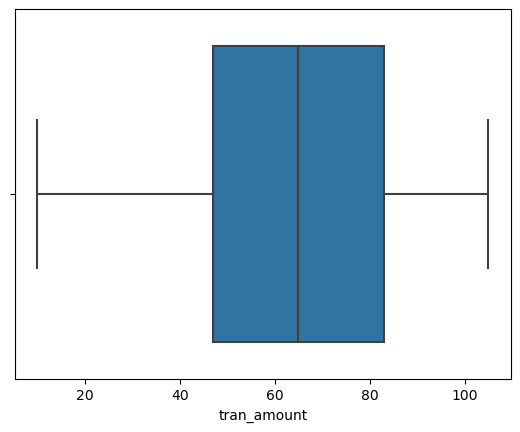

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the FutureWarning related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Create a boxplot of 'tran_amount'
sns.boxplot(x=df['tran_amount'])

# Display the plot
plt.show()

In [ ]:
df['month']= df['trans_date'].dt.month
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
monthly_Sales= df.groupby('month')['tran_amount'].sum()
monthly_Sales= monthly_Sales.sort_values(ascending=False).reset_index().head(3)
monthly_Sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [ ]:
# Customers having highest num of orders

customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']
top_5_cus= customer_counts.sort_values(by='count', ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

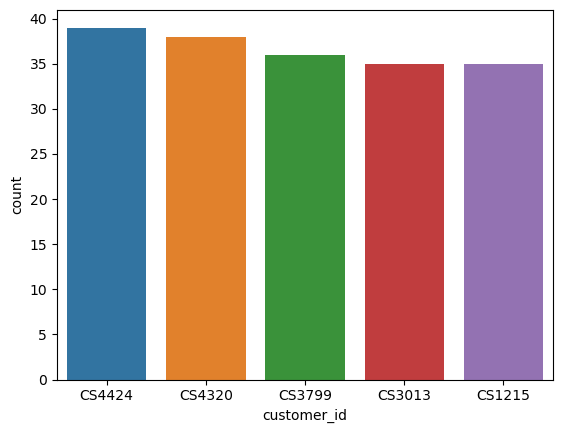

In [ ]:
#Barplot for Customers having highest num of orders
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [ ]:
# Customers having highest value of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
top_5_sal= customer_sales.sort_values(by='tran_amount', ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

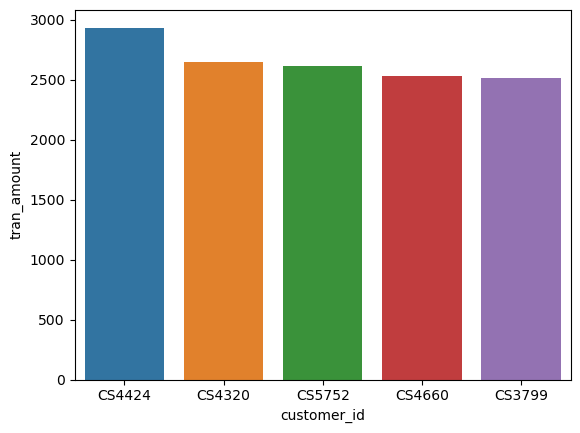

In [ ]:
#Barplot Customers having highest value of orders
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

In [ ]:
# Advanced Analytics

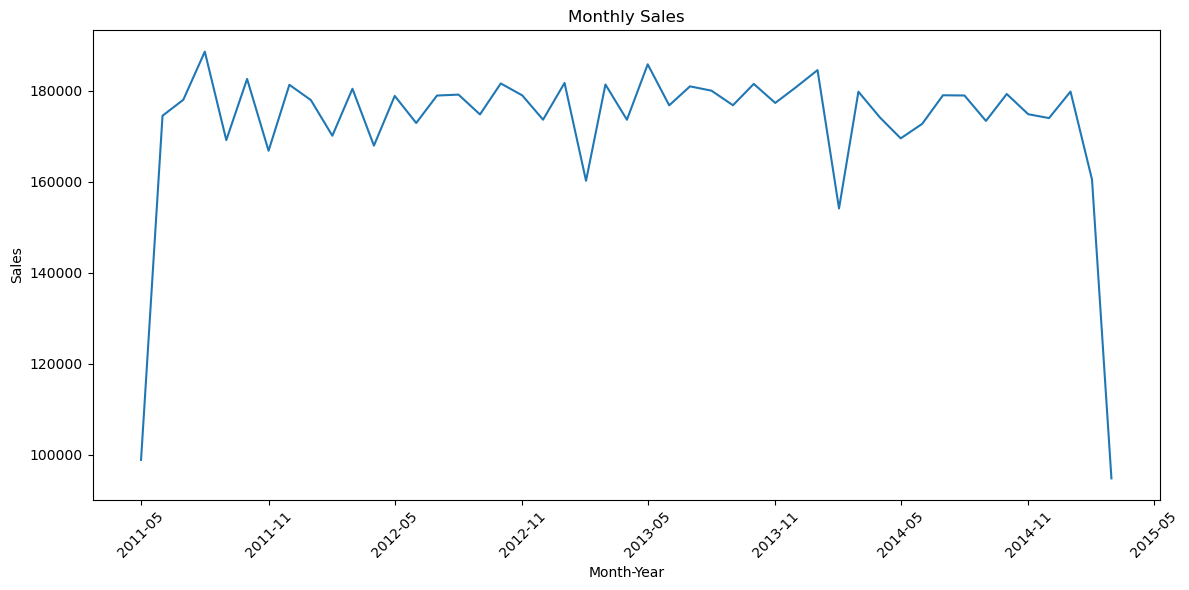

In [ ]:
# Time Series Analysis
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'trans_date' is already in datetime format
df['month_year'] = df['trans_date'].dt.to_period('M')

monthly_sales = df.groupby('month_year')['tran_amount'].sum()

# Convert the PeriodIndex to DateTimeIndex
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12, 6))  # Increase the size of the figure
plt.plot(monthly_sales.index, monthly_sales.values)  # Plot the data

# Format the x-axis labels to show Year-Month (e.g., '2023-01')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set the x-axis interval to show labels every 6 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better visibility
plt.show()

In [ ]:
#Cohort Segmentation
# Recency will be the maximum of trans_date
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency will be the count of transactions
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary will be the sum of tran_amount
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine all three into a DataFrame
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})

In [ ]:
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (2011 <= row['recency'].year < 2012) and (10 < row['frequency'] <= 15) and (500 < row['monetary'] <= 1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [ ]:
set(rfm['Segment'])

{'P0', 'P2'}

In [ ]:
#Chrun Analysis

<Axes: xlabel='response'>

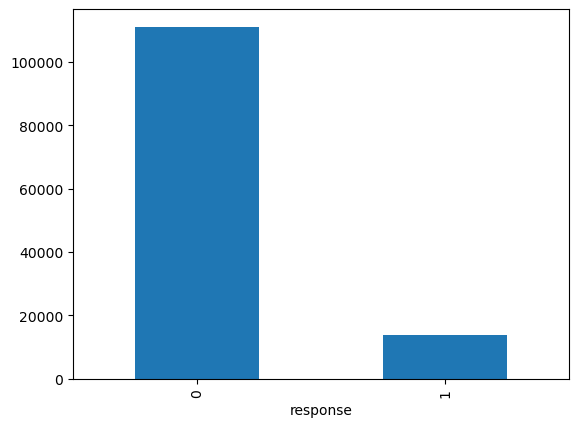

In [ ]:
# Count the number of churned and active customers
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')

<Axes: xlabel='month_year'>

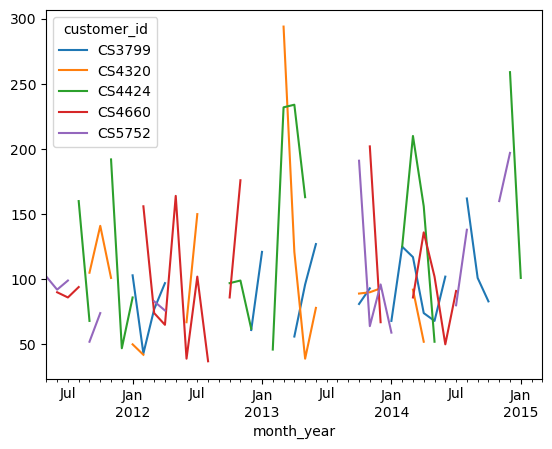

In [ ]:
# Analyzing top customers
# Top 5 customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index

# Filter transactions of top 5 customers
top_customers_df = df[df['customer_id'].isin(top_5_customers)]

# Plot their monthly sales
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
top_customers_sales.plot(kind='line')

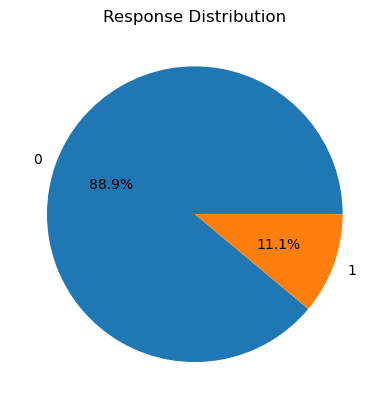

In [ ]:
# Pie chart for response distribution
response_counts = df['response'].value_counts()
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%')
plt.title('Response Distribution')
plt.show()

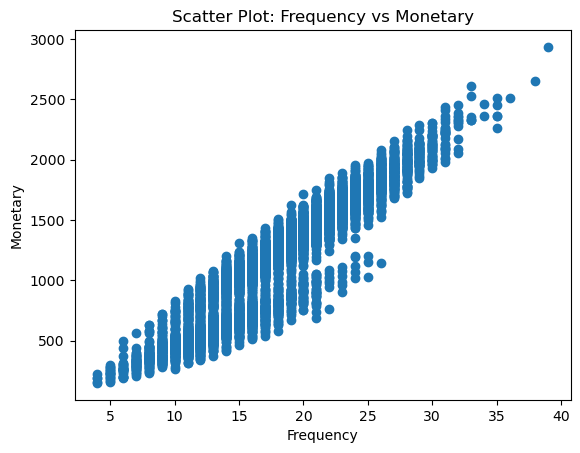

In [ ]:
# Scatter plot of frequency vs monetary
plt.scatter(rfm['frequency'], rfm['monetary'])
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Scatter Plot: Frequency vs Monetary')
plt.show()

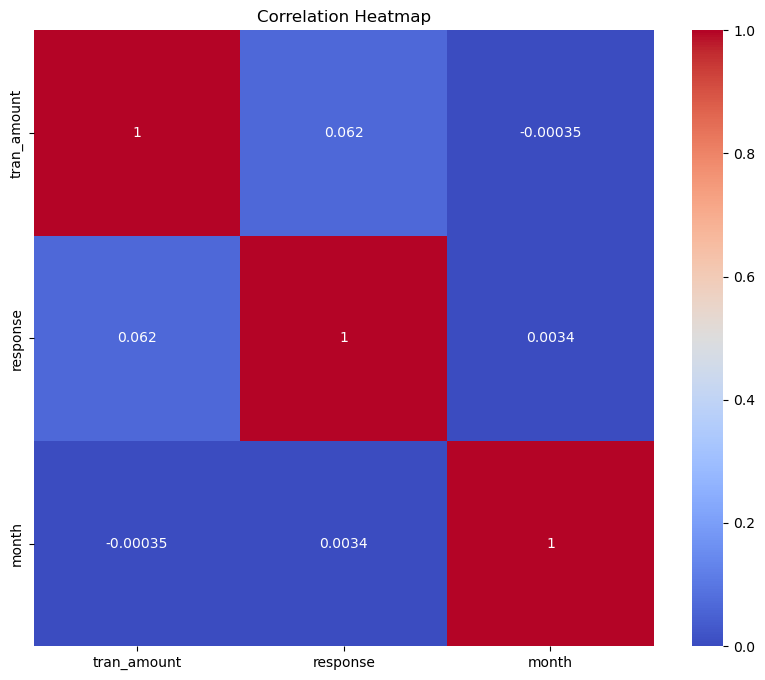

In [ ]:
# Assuming you have numeric columns you want to include in the correlation matrix
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

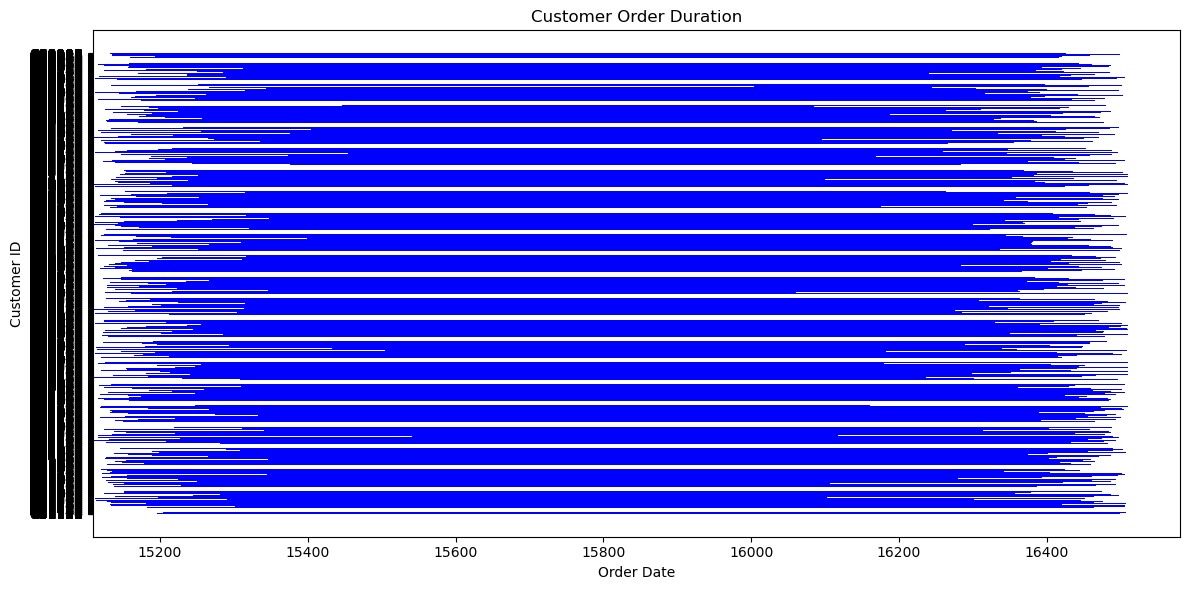

In [ ]:
customer_order_dates = df.groupby('customer_id')['trans_date'].agg(['min', 'max']).reset_index()

plt.figure(figsize=(12, 6))
plt.barh(customer_order_dates['customer_id'], width=(customer_order_dates['max'] - customer_order_dates['min']).dt.days,
         left=customer_order_dates['min'], color='blue')
plt.xlabel('Order Date')
plt.ylabel('Customer ID')
plt.title('Customer Order Duration')
plt.tight_layout()
plt.show()

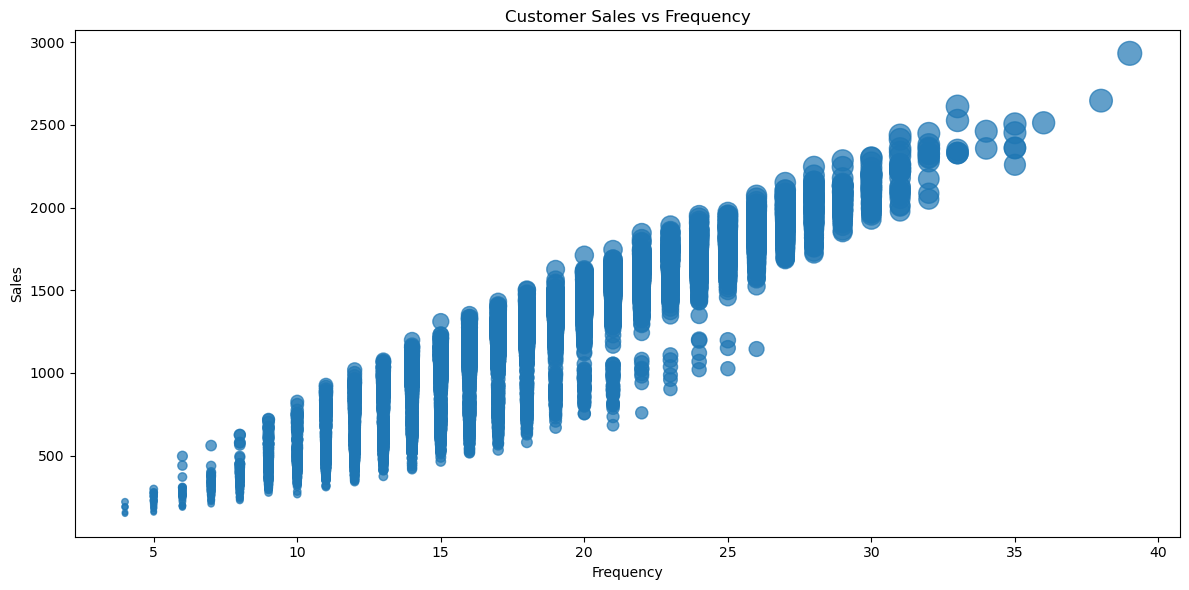

In [ ]:
customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_frequency = df.groupby('customer_id')['trans_date'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(customer_frequency['trans_date'], customer_sales['tran_amount'], s=customer_sales['tran_amount']/10,
            alpha=0.7)
plt.xlabel('Frequency')
plt.ylabel('Sales')
plt.title('Customer Sales vs Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('MainData.csv')

In [ ]:
rfm.to_csv('AddAnlys.csv')